In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

max_iteration = 100  # 修正拼写错误
filepath = "iris.csv"

class My_K_Mean:
    def __init__(self, cen_num):
        self.cen = None
        self.cen_num = cen_num
        self.df = None
        self.X = None
        self.D = None
        self.labels = None

    def load_data(self, filepath):   
        self.df = pd.read_csv(filepath, header=0)
        self.X = self.df.iloc[:, 1:-1].values  # iris features

    def min_distance(self):  # 距离矩阵
        # 计算所有点到所有中心点的距离平方
        self.D = np.sum((self.X[:, np.newaxis, :] - self.cen[np.newaxis, :, :]) ** 2, axis=2)
        return np.min(self.D, axis=1)

    def select_cen(self):  # 初始化中心点
        # 初始化空数
        self.cen = np.empty((0, self.X.shape[1]))
        
        # 选择第一个中心点
        idx = np.random.choice(self.X.shape[0], size=1, replace=False)
        self.cen = np.vstack([self.cen, self.X[idx]])
        
        # 选择剩余中心点
        for _ in range(1, self.cen_num):
            mD = self.min_distance()
            P = mD / np.sum(mD)  #作为下一中心点的概率
            #new_idx = np.random.choice(len(P), p=P) # s随机
            new_idx = np.argmax(P)
            self.cen = np.vstack([self.cen, self.X[new_idx].reshape(1, -1)])

    def arg_label(self):  # 分配簇标签
        # 重新计算距离矩阵
        self.D = np.sum((self.X[:, np.newaxis, :] - self.cen[np.newaxis, :, :]) ** 2, axis=2)
        self.labels = np.argmin(self.D, axis=1)

    def update_cen(self):  # 更新中心点
        new_cens = []
        for i in range(self.cen_num):
            # 计算每个簇的新中心点
            cluster_points = self.X[self.labels == i]
            if len(cluster_points) > 0:
                new_cens.append(cluster_points.mean(axis=0))
            else:
                # 如果簇为空，随机选择一个点作为中心
                new_cens.append(self.X[np.random.choice(self.X.shape[0], 1)])
        self.cen = np.array(new_cens)

    def kmeans(self):
        # 初始化
        self.select_cen()
        
        for _ in range(max_iteration):
            # 分配标签
            self.arg_label()
            
            # 保存旧中心点用于收敛判断
            old_cen = self.cen.copy()
            
            # 更新中心点
            self.update_cen()
            
            # 检查是否收敛
            if np.allclose(old_cen, self.cen):
                break

# TEST
km = My_K_Mean(cen_num=3)
km.load_data(filepath)
km.kmeans()
print("Cluster labels:", km.labels)
print(km.X)


Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2

## 已知使用iris数据（四维）， 使用三维可视化

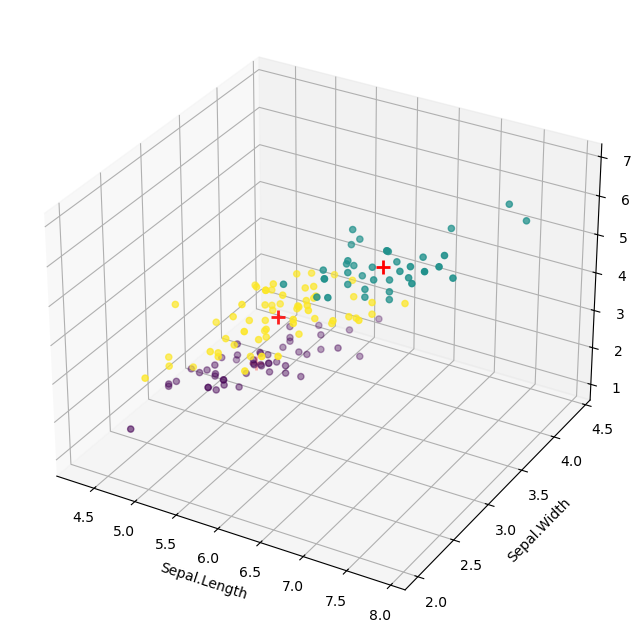

In [86]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(projection = '3d')
ax.set_xlabel('Sepal.Length')
ax.set_ylabel('Sepal.Width')
ax.set_zlabel('Petal.Length')
ax.scatter(
    km.X[:, 0],  # x
    km.X[:, 1],  # y
    km.X[:, 2],  # z
    c=km.labels  # 使用labels作为颜色
)
ax.scatter(
    km.cen[:, 0],  
    km.cen[:, 1],  
    km.cen[:, 2],  
    marker='+',    # 使用"+"标记
    s=100,         # 标记大小
    linewidths=2,  # 线宽
    color='r'      
)

plt.show()